# SPR Exercise 1-6
## Question 6
By Gholamreza Dar

https://gholamrezadar.ir/

Dec 2021


Questions available at : [Github Link](https://github.com/Gholamrezadar/statistical-pattern-recognition-exercises/blob/main/SPR_HW1.pdf)

##Loading the Data

In [1]:
!wget https://raw.githubusercontent.com/Gholamrezadar/statistical-pattern-recognition-exercises/main/first_half_logs.rar
!wget https://www.3dxo.com/images/textures/l/fussballfeld_03_c.jpg

--2021-12-06 16:11:05--  https://raw.githubusercontent.com/Gholamrezadar/statistical-pattern-recognition-exercises/main/first_half_logs.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17472112 (17M) [application/octet-stream]
Saving to: ‘first_half_logs.rar’

first_half_logs.rar 100%[===================>]  16.66M  --.-KB/s    in 0.1s    

2021-12-06 16:11:06 (130 MB/s) - ‘first_half_logs.rar’ saved [17472112/17472112]

--2021-12-06 16:11:06--  https://www.3dxo.com/images/textures/l/fussballfeld_03_c.jpg
Resolving www.3dxo.com (www.3dxo.com)... 134.119.2.84, 2a00:1158:1000:407::54
Connecting to www.3dxo.com (www.3dxo.com)|134.119.2.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 842598 (823K) [image/jpeg]
Saving to: ‘fussballf

In [2]:
!unrar x "/content/first_half_logs.rar" "/content/data/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/first_half_logs.rar

Creating    /content/data                                             OK
Creating    /content/data/first_half_logs                             OK
Extracting  /content/data/first_half_logs/first_half_logs.csv              0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82%

In [3]:
!pip install lmfit

     |████████████████████████████████| 292 kB 4.8 MB/s 
     |████████████████████████████████| 98 kB 4.4 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84401 sha256=e10f1798ea9a8725018506f746b74791f80b7a17005e8458576ee8081a6525a6
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.25-py3-none-any.whl size=17301 sha256=3f24b8a2791566a3af72538383b498e1412ceb7c89629bf3ec6899ba43bec7f1
  Stored in directory: /root/.cache/pip/wheels/4a/87/53/f1385a55b3f60eabb921c5f4fd151c00fdb016b5111b8c830f
Successfully built lmfit asteval


In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("dark")
# sns.set(rc={'axes.facecolor':'seagreen', 'figure.facecolor':'palegreen'})
sns.set_palette("bright")

In [5]:
def soccer_pitch():
  import matplotlib.image as mpimg 
  map_img = mpimg.imread('/content/fussballfeld_03_c.jpg')
  plt.imshow(map_img, zorder=0, extent=[0.0, 105.0, 0.0, 68])

In [6]:
X = pd.read_csv("/content/data/first_half_logs/first_half_logs.csv", header=None, names=["time_stamp","tag_id","x_pos","y_pos","4","5","6","7","total_distance"])
X

,time_stamp,tag_id,x_pos,y_pos,4,5,6,7,total_distance
0,2013-11-03 18:01:09.002174,9,32.2538,12.7243,0.234750,0.000000,254.04000,0.000000,329.554000
1,2013-11-03 18:01:09.006261,13,21.1081,17.6180,1.413400,1.741270,202.25000,0.907549,241.842000
2,2013-11-03 18:01:09.007529,14,28.5255,17.5359,1.640910,-3.038100,190.64800,0.572368,241.965000
3,2013-11-03 18:01:09.027034,10,45.2474,14.4618,1.129020,0.000000,342.24400,0.000000,349.529000
4,2013-11-03 18:01:09.028946,8,28.5504,39.5494,0.927515,2.527040,304.31900,1.060790,250.349000
...,...,...,...,...,...,...,...,...,...
625698,2013-11-03 18:48:21.974331,8,27.4261,41.5728,0.762573,0.650587,7226.98000,1.399650,6067.950000
625699,2013-11-03 18:48:21.979369,2,26.0429,33.2817,0.260647,0.175019,5980.39000,1.875730,5849.060000
625700,2013-11-03 18:48:21.98049,7,33.2563,43.3233,1.504540,0.179098,6438.95000,1.841590,6622.920000
625701,2013-11-03 18:48:21.989198,12,72.6697,71.7267,-0.963466,0.000000,2.37582,0.000000,0.285215


#### Remove noisy data
data seems to have some noise 

look at players **6,11,12**

they might be warming up for the next

 half of the game.


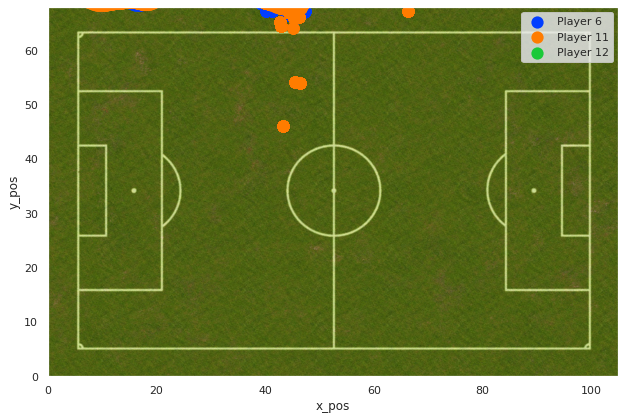

In [7]:
fig, ax = plt.subplots(figsize=(10.5,6.8))

player6 = X.loc[X["tag_id"] == 6]
player11 = X.loc[X["tag_id"] == 11]
player12 = X.loc[X["tag_id"] == 12]

sns.scatterplot(data=player6, x="x_pos", y="y_pos", legend="full", s=150, linewidth=0)
sns.scatterplot(data=player11, x="x_pos", y="y_pos", legend="full", s=150, linewidth=0)
sns.scatterplot(data=player12, x="x_pos", y="y_pos", legend="full", s=150, linewidth=0)

soccer_pitch()

ax.legend(["Player 6","Player 11","Player 12"])
ax.set_xbound([0,105])
ax.set_ybound([0,68])

In [8]:
# remove player 6, 11, 12
X_filtered = X.loc[~X.tag_id.isin([6, 11, 12])]

## Helper Functions

In [9]:
def plot_player_heatmap(tag_id, ax, resolution=3,):
  player = X_filtered.loc[X_filtered["tag_id"] == tag_id]

  x = player.x_pos
  y = player.y_pos

  xedges = list(range(0,105+1, resolution))
  yedges = list(range(0,68+1, resolution))

  # Set 'density=True' to get a probability density function(integral = 1)
  # instead of ferquency
  H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges), density=True)
  H = H.T # refer to histogram2d doc
  X, Y = np.meshgrid(xedges, yedges)
  ax.pcolormesh(X, Y, H)
  return H, xedges, yedges

In [10]:
def plot_every_player_heatmap(resolution=3, dpi=60):
  histograms = {}
  fig, axs = plt.subplots(3, 4,
                          figsize=(12,7),
                          constrained_layout=True,
                          sharex=True,
                          sharey=True,
                          dpi=dpi)
  
  # Heatmap for every player
  index = 0
  for tag_id in sorted(X_filtered.tag_id.unique()):
    ax = axs[index//4][index%4]
    H, xedges, yedges = plot_player_heatmap(tag_id, ax, resolution)
    histograms[tag_id] = H
    index+=1

    ax.title.set_text(f"Player {tag_id}")
  
  # last cell is empty
  axs[-1][-1].remove()
  return histograms, xedges, yedges

In [21]:
def plot_gaussian_estimation(tag_id):
  import lmfit
  from lmfit.lineshapes import gaussian2d
  from scipy.interpolate import griddata

  # 1. Data preparation
  current_player_hist = histograms[tag_id]

  x = []
  y = []
  z = []

  for i in range(len(current_player_hist)):
    for j in range(len(current_player_hist[0])):
      y.append(i)
      x.append(j)
      z.append(current_player_hist[i][j])

  x = np.array(x)
  y = np.array(y)
  z = np.array(z)

  error = np.sqrt(z+1)

  X, Y = np.meshgrid(np.linspace(x.min(), x.max(), len(current_player_hist[0])),
                   np.linspace(y.min(), y.max(), len(current_player_hist)))
  Z = griddata((x, y), z, (X, Y), method='linear', fill_value=0)

  # 2. Fit a Gaussian distribution to the data
  model = lmfit.models.Gaussian2dModel()
  params = model.guess(z, x, y)
  result = model.fit(z, x=x, y=y,params=params, weights=1/error)

  # 3. Plot Heatmap for the fitted Gaussian Distribution and the original data
  fig, axs = plt.subplots(1, 2, figsize=(13, 4), constrained_layout=True)
  vmax = np.nanpercentile(Z, 99.9)

  # Original Data
  ax = axs[0]
  art = ax.pcolor(X, Y, Z, vmin=0, vmax=vmax, cmap="magma")
  plt.colorbar(art, ax=ax, label='P(x,y)')
  ax.set_title('Original Data')

  # Fitted Gaussian
  ax = axs[1]
  fit = model.func(X, Y, **result.best_values)
  art = ax.pcolor(X, Y, fit, vmin=0, vmax=vmax, cmap="magma")
  plt.colorbar(art, ax=ax, label='P(x,y)')
  ax.set_title('Fitted Gaussian')

  # Matplotlib stuff
  for ax in axs.ravel():
      ax.set_xlabel('x')
      ax.set_ylabel('y')
  plt.show()

  # print result
  centerx = result.params["centerx"].value*resolution
  centery = result.params["centery"].value*resolution
  sigmax = result.params["sigmax"].value*resolution
  sigmay = result.params["sigmay"].value*resolution

  print(f"Mean : ({round(centerx, 3)}, {round(centery, 3)})")
  print(f"Cov : ({round(sigmax*sigmax, 3)} {round(0, 3)})")
  print(f"      ({round(0, 3)} {round(sigmay*sigmay, 3)})")

  # saving result and model
  return result, model

##A) Plotting players' mean position

In [12]:
mean_locations = X_filtered.groupby(by="tag_id").mean()[[ "x_pos", "y_pos"]].reset_index()

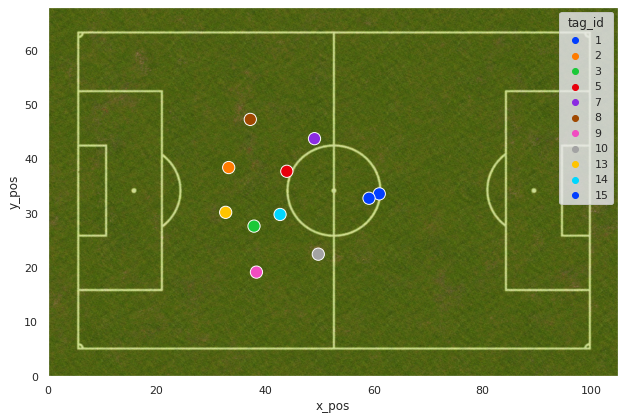

In [13]:
fig, ax = plt.subplots(figsize=(10.5,6.8))
soccer_pitch()
sns.scatterplot(data=mean_locations, x="x_pos", y="y_pos", hue="tag_id", legend="full", palette=sns.color_palette(n_colors=len(mean_locations)), s=150)
ax.set_xbound([0,105])
ax.set_ybound([0,68])

##B) Finding a gaussian distribution for EACH Player
Also plotting a heatmap, mean and covariance matrix

#### lmfit 2D gaussian

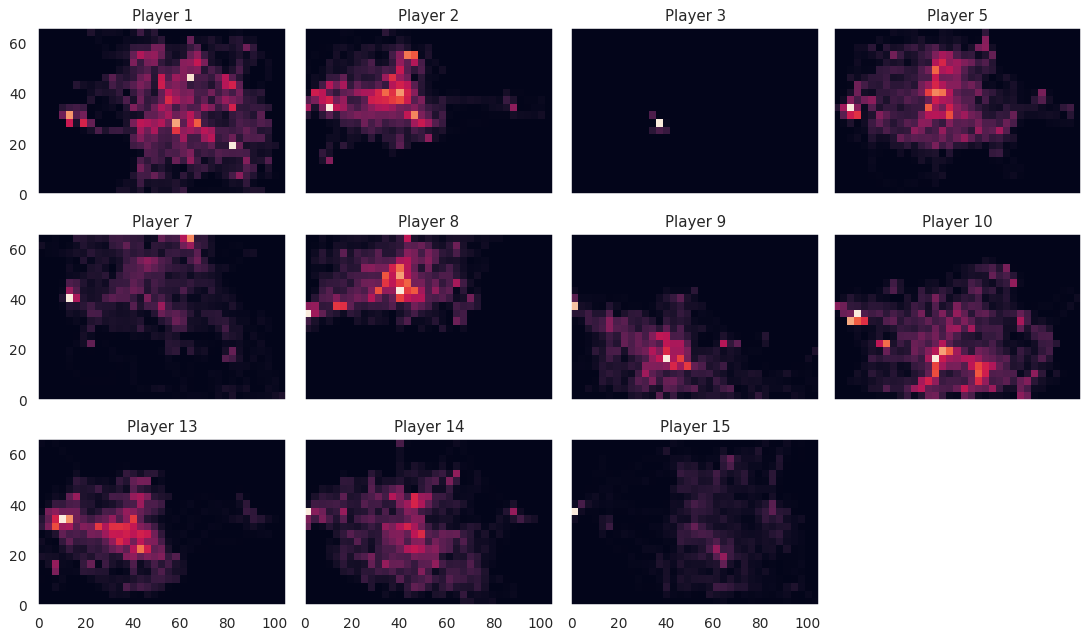

In [14]:
# Divide the soccer pitch into 3m x 3m tiles for histogram
resolution = 3
# Plots heatmaps and returns histograms for each player
histograms, xedges, yedges = plot_every_player_heatmap(dpi=90, resolution=resolution)

#### Plotting Every Players' fitted Gaussian Distribution

Player 1 : 


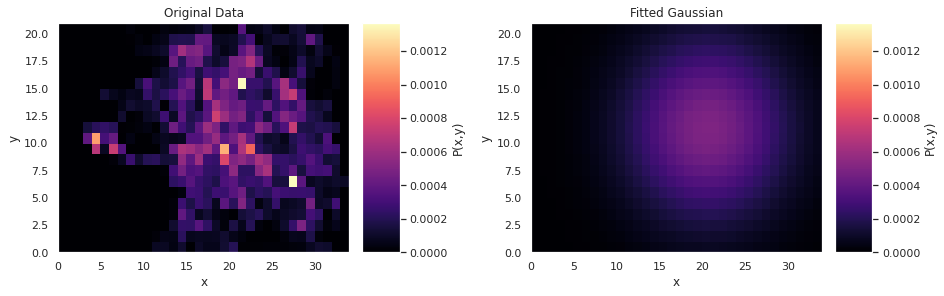

Mean : (60.608, 32.612)
Cov : (386.726 0)
      (0 302.963)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 770
    # variables        = 5
    chi-square         = 1.4679e-05
    reduced chi-square = 1.9189e-08
    Akaike info crit   = -13677.0970
    Bayesian info crit = -13653.8650
[[Variables]]
    amplitude:  0.11987299 +/- 0.00459757 (3.84%) (init = 0.02769804)
    centerx:    20.2027448 +/- 0.23653415 (1.17%) (init = 27)
    centery:    10.8707373 +/- 0.21474491 (1.98%) (init = 6)
    sigmax:     6.55512072 +/- 0.24217371 (3.69%) (init = 5.666667)
    sigmay:     5.80194556 +/- 0.23960490 (4.13%) (init = 3.5)
    fwhmx:      15.4361294 +/- 0.57027550 (3.69%) == '2.3548200*sigmax'
    fwhmy:      13.6625374 +/- 0.56422641 (4.13%) == '2.3548200*sigmay'
    height:     0.00495093 +/- 1.8224e-04 (3.68%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(

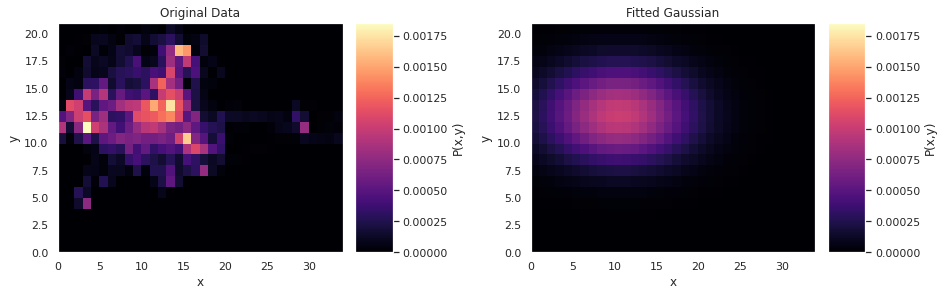

Mean : (30.316, 36.57)
Cov : (315.775 0)
      (0 80.897)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 80
    # data points      = 770
    # variables        = 5
    chi-square         = 2.7180e-05
    reduced chi-square = 3.5529e-08
    Akaike info crit   = -13202.7596
    Bayesian info crit = -13179.5277
[[Variables]]
    amplitude:  0.11391220 +/- 0.00413989 (3.63%) (init = 0.04398991)
    centerx:    10.1052905 +/- 0.21305882 (2.11%) (init = 3)
    centery:    12.1899966 +/- 0.10513592 (0.86%) (init = 11)
    sigmax:     5.92335601 +/- 0.22669710 (3.83%) (init = 5.666667)
    sigmay:     2.99810037 +/- 0.10518094 (3.51%) (init = 3.5)
    fwhmx:      13.9484372 +/- 0.53383087 (3.83%) == '2.3548200*sigmax'
    fwhmy:      7.05998670 +/- 0.24768217 (3.51%) == '2.3548200*sigmay'
    height:     0.01007572 +/- 3.5744e-04 (3.55%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(am

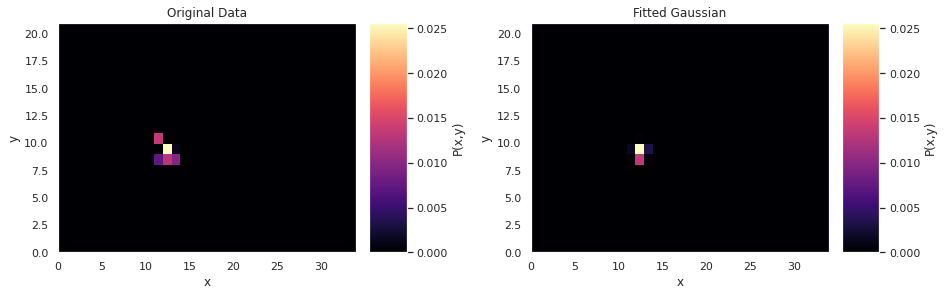

Mean : (36.175, 26.183)
Cov : (1.32 0)
      (0 1.282)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 75
    # data points      = 770
    # variables        = 5
    chi-square         = 3.1351e-04
    reduced chi-square = 4.0981e-07
    Akaike info crit   = -11319.8392
    Bayesian info crit = -11296.6072
[[Variables]]
    amplitude:  0.07900076 +/- 0.00534164 (6.76%) (init = 1.317091)
    centerx:    12.0584893 +/- 0.03177343 (0.26%) (init = 12)
    centery:    8.72764693 +/- 0.07065023 (0.81%) (init = 9)
    sigmax:     0.38295635 +/- 0.01314019 (3.43%) (init = 5.666667)
    sigmay:     0.37737076 +/- 0.05836703 (15.47%) (init = 3.5)
    fwhmx:      0.90179327 +/- 0.03094279 (3.43%) == '2.3548200*sigmax'
    fwhmy:      0.88864020 +/- 0.13744384 (15.47%) == '2.3548200*sigmay'
    height:     0.85868451 +/- 0.18505952 (21.55%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(cent

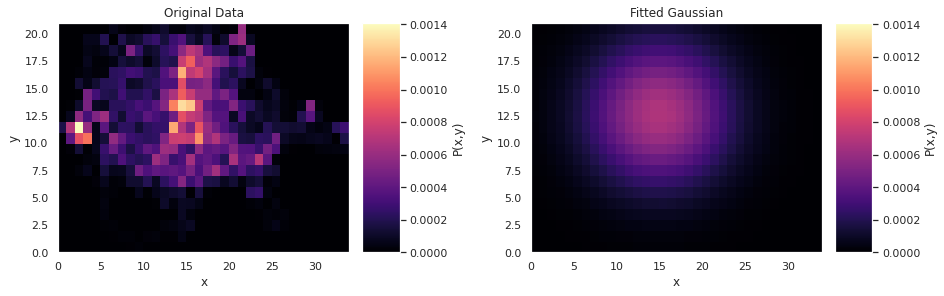

Mean : (43.572, 36.733)
Cov : (295.694 0)
      (0 186.22)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 98
    # data points      = 770
    # variables        = 5
    chi-square         = 1.7458e-05
    reduced chi-square = 2.2820e-08
    Akaike info crit   = -13543.6352
    Bayesian info crit = -13520.4032
[[Variables]]
    amplitude:  0.11231811 +/- 0.00394599 (3.51%) (init = 0.03464119)
    centerx:    14.5238541 +/- 0.19768612 (1.36%) (init = 2)
    centery:    12.2444895 +/- 0.15841403 (1.29%) (init = 11)
    sigmax:     5.73192006 +/- 0.19865593 (3.47%) (init = 5.666667)
    sigmay:     4.54874691 +/- 0.16444453 (3.62%) (init = 3.5)
    fwhmx:      13.4976400 +/- 0.46779896 (3.47%) == '2.3548200*sigmax'
    fwhmy:      10.7114802 +/- 0.38723726 (3.62%) == '2.3548200*sigmay'
    height:     0.00676671 +/- 2.3521e-04 (3.48%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(a

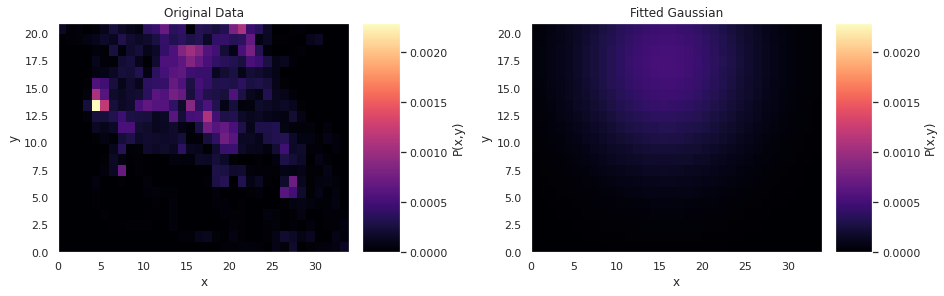

Mean : (45.971, 50.892)
Cov : (438.632 0)
      (0 361.544)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 770
    # variables        = 5
    chi-square         = 2.6815e-05
    reduced chi-square = 3.5052e-08
    Akaike info crit   = -13213.1727
    Bayesian info crit = -13189.9407
[[Variables]]
    amplitude:  0.14616802 +/- 0.01129011 (7.72%) (init = 0.05630246)
    centerx:    15.3237060 +/- 0.32592767 (2.13%) (init = 4)
    centery:    16.9640694 +/- 0.52981327 (3.12%) (init = 13)
    sigmax:     6.98117944 +/- 0.33275325 (4.77%) (init = 5.666667)
    sigmay:     6.33810165 +/- 0.51797133 (8.17%) (init = 3.5)
    fwhmx:      16.4394210 +/- 0.78357401 (4.77%) == '2.3548200*sigmax'
    fwhmy:      14.9250885 +/- 1.21972924 (8.17%) == '2.3548200*sigmay'
    height:     0.00518901 +/- 2.3614e-04 (4.55%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(

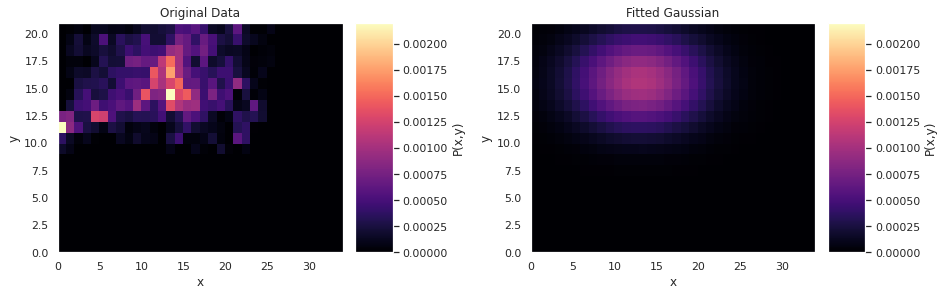

Mean : (37.952, 45.74)
Cov : (263.197 0)
      (0 77.614)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 56
    # data points      = 770
    # variables        = 5
    chi-square         = 2.3048e-05
    reduced chi-square = 3.0128e-08
    Akaike info crit   = -13329.7408
    Bayesian info crit = -13306.5089
[[Variables]]
    amplitude:  0.10757580 +/- 0.00352474 (3.28%) (init = 0.04378009)
    centerx:    12.6506869 +/- 0.17476743 (1.38%) (init = 13)
    centery:    15.2466544 +/- 0.09537972 (0.63%) (init = 14)
    sigmax:     5.40778324 +/- 0.17652483 (3.26%) (init = 5.666667)
    sigmay:     2.93661885 +/- 0.09793179 (3.33%) (init = 3.5)
    fwhmx:      12.7343561 +/- 0.41568421 (3.26%) == '2.3548200*sigmax'
    fwhmy:      6.91520880 +/- 0.23061173 (3.33%) == '2.3548200*sigmay'
    height:     0.01064064 +/- 3.4588e-04 (3.25%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(a

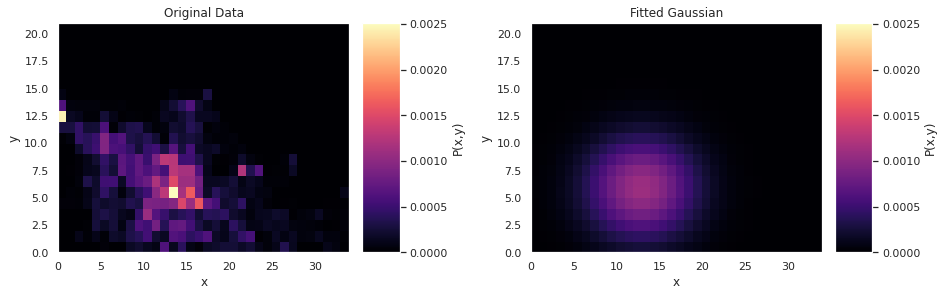

Mean : (37.486, 16.291)
Cov : (175.236 0)
      (0 93.353)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 770
    # variables        = 5
    chi-square         = 2.5752e-05
    reduced chi-square = 3.3663e-08
    Akaike info crit   = -13244.3003
    Bayesian info crit = -13221.0684
[[Variables]]
    amplitude:  0.09896007 +/- 0.00358322 (3.62%) (init = 0.05435125)
    centerx:    12.4951682 +/- 0.15498614 (1.24%) (init = 13)
    centery:    5.43043844 +/- 0.11547246 (2.13%) (init = 5)
    sigmax:     4.41255755 +/- 0.15515550 (3.52%) (init = 5.666667)
    sigmay:     3.22064978 +/- 0.12208483 (3.79%) (init = 3.5)
    fwhmx:      10.3907788 +/- 0.36536328 (3.52%) == '2.3548200*sigmax'
    fwhmy:      7.58405051 +/- 0.28748780 (3.79%) == '2.3548200*sigmay'
    height:     0.01093820 +/- 3.8837e-04 (3.55%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(a

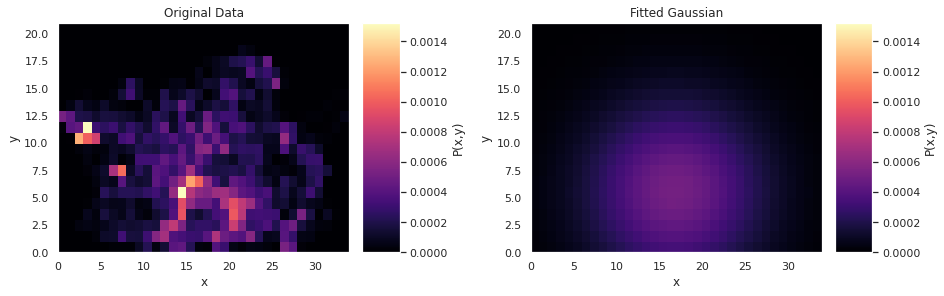

Mean : (49.296, 15.524)
Cov : (458.662 0)
      (0 289.988)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 770
    # variables        = 5
    chi-square         = 1.9039e-05
    reduced chi-square = 2.4888e-08
    Akaike info crit   = -13476.8671
    Bayesian info crit = -13453.6351
[[Variables]]
    amplitude:  0.13193875 +/- 0.00696003 (5.28%) (init = 0.03031352)
    centerx:    16.4319520 +/- 0.28480677 (1.73%) (init = 3)
    centery:    5.17464268 +/- 0.30710484 (5.93%) (init = 11)
    sigmax:     7.13879789 +/- 0.29046475 (4.07%) (init = 5.666667)
    sigmay:     5.67634468 +/- 0.33436652 (5.89%) (init = 3.5)
    fwhmx:      16.8105841 +/- 0.68399220 (4.07%) == '2.3548200*sigmax'
    fwhmy:      13.3667700 +/- 0.78737297 (5.89%) == '2.3548200*sigmay'
    height:     0.00511444 +/- 2.0514e-04 (4.01%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(

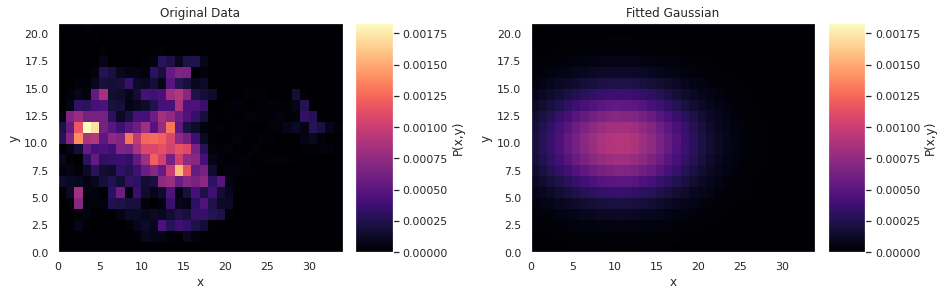

Mean : (30.267, 28.761)
Cov : (318.059 0)
      (0 96.874)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 81
    # data points      = 770
    # variables        = 5
    chi-square         = 2.4483e-05
    reduced chi-square = 3.2004e-08
    Akaike info crit   = -13283.2247
    Bayesian info crit = -13259.9928
[[Variables]]
    amplitude:  0.11321515 +/- 0.00412267 (3.64%) (init = 0.04414125)
    centerx:    10.0889986 +/- 0.21425323 (2.12%) (init = 3)
    centery:    9.58695651 +/- 0.11513245 (1.20%) (init = 11)
    sigmax:     5.94473698 +/- 0.22824007 (3.84%) (init = 5.666667)
    sigmay:     3.28082472 +/- 0.11519623 (3.51%) (init = 3.5)
    fwhmx:      13.9987855 +/- 0.53746427 (3.84%) == '2.3548200*sigmax'
    fwhmy:      7.72575167 +/- 0.27126639 (3.51%) == '2.3548200*sigmay'
    height:     0.00911819 +/- 3.2383e-04 (3.55%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(a

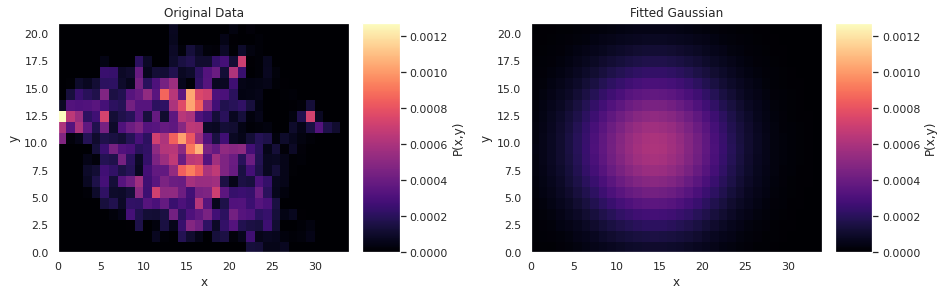

Mean : (41.924, 27.461)
Cov : (323.053 0)
      (0 219.007)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 89
    # data points      = 770
    # variables        = 5
    chi-square         = 1.6723e-05
    reduced chi-square = 2.1860e-08
    Akaike info crit   = -13576.7528
    Bayesian info crit = -13553.5208
[[Variables]]
    amplitude:  0.11360136 +/- 0.00415476 (3.66%) (init = 0.03866147)
    centerx:    13.9746244 +/- 0.21334062 (1.53%) (init = 0)
    centery:    9.15373758 +/- 0.17786091 (1.94%) (init = 12)
    sigmax:     5.99122503 +/- 0.21564490 (3.60%) (init = 5.666667)
    sigmay:     4.93296323 +/- 0.18725512 (3.80%) (init = 3.5)
    fwhmx:      14.1082565 +/- 0.50780493 (3.60%) == '2.3548200*sigmax'
    fwhmy:      11.6162405 +/- 0.44095210 (3.80%) == '2.3548200*sigmay'
    height:     0.00603782 +/- 2.1722e-04 (3.60%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(

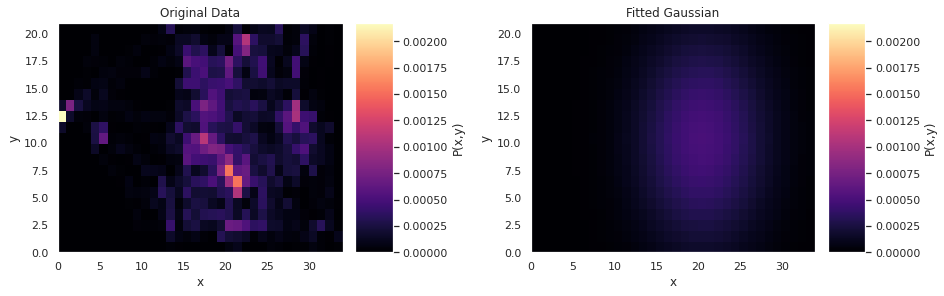

Mean : (60.299, 29.609)
Cov : (259.414 0)
      (0 420.82)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 187
    # data points      = 770
    # variables        = 5
    chi-square         = 3.5354e-05
    reduced chi-square = 4.6214e-08
    Akaike info crit   = -13000.3076
    Bayesian info crit = -12977.0757
[[Variables]]
    amplitude:  0.11613879 +/- 0.00765564 (6.59%) (init = 0.08405921)
    centerx:    20.0995972 +/- 0.30568692 (1.52%) (init = 0)
    centery:    9.86980135 +/- 0.42156716 (4.27%) (init = 12)
    sigmax:     5.36877479 +/- 0.30682737 (5.72%) (init = 5.666667)
    sigmay:     6.83796303 +/- 0.52228567 (7.64%) (init = 3.5)
    fwhmx:      12.6424982 +/- 0.72252323 (5.72%) == '2.3548200*sigmax'
    fwhmy:      16.1021721 +/- 1.22988873 (7.64%) == '2.3548200*sigmay'
    height:     0.00496930 +/- 2.9421e-04 (5.92%) == '1.5707963*amplitude/(max(1e-15, sigmax)*max(1e-15, sigmay))'
[[Correlations]] (unreported correlations are < 0.100)
    C(

In [22]:
models = {}
results = {}
for tag_id in sorted(X_filtered.tag_id.unique()):
  print(f"Player {tag_id} : ")

  # Fitting a model to player[i]'s data
  result, model = plot_gaussian_estimation(tag_id)

  # Save the model and result for question c and d
  models[tag_id] = model
  results[tag_id] = result

  print()

##C) Probability of being at a random location
Choose 3 random players
Choose 3 random location for each of them
find the prob. of that player being at that location

In [16]:
candidate_players = [1, 2, 9, 10]
candidate_positions = np.random.rand(3,2)*np.array([105,68])

for tag_id in candidate_players:
  print(f"Probability of Player {tag_id} being at")
  for pos in candidate_positions:

    posx = pos[0]/resolution
    posy = pos[1]/resolution

    # mean of player 2, use for debugging
    posx = 11
    posy = 12.5

    model = models[tag_id]
    result = results[tag_id]

    # calculate the prob. of player 'tag_id' being at position 'pos'
    # need to integrate over a patch around posx, posy 
    
    # integral parameters
    d = 0.006 # delta
    radius = 1 # half of the range
    N = radius*2/d # number of summations
    
    # while loop inits
    p = 0.0
    y = posy-radius

    # integral approximation
    while(y <= posy+radius):
      x = posx-radius
      while(x <= posx+radius):
        p += model.func(x, y, **result.best_values)
        x += d
      y += d
    
    p /= N

    print(f"  ({round(pos[0], 3)}, {round(pos[1], 3)}) : {round(p, 4)}")
  print()

Probability of Player 1 being at
  (80.696, 0.489) : 0.0602
  (90.631, 13.184) : 0.0602
  (52.028, 66.94) : 0.0602

Probability of Player 2 being at
  (80.696, 0.489) : 0.3284
  (90.631, 13.184) : 0.3284
  (52.028, 66.94) : 0.3284

Probability of Player 9 being at
  (80.696, 0.489) : 0.0332
  (90.631, 13.184) : 0.0332
  (52.028, 66.94) : 0.0332

Probability of Player 10 being at
  (80.696, 0.489) : 0.0566
  (90.631, 13.184) : 0.0566
  (52.028, 66.94) : 0.0566



In [17]:
# print(f"Probability of Player 1 being at")
# print(f"  ({33.0}, {37.5}) : {0.0602}")
# print()
# print(f"Probability of Player 2 being at")
# print(f"  ({33.0}, {37.5}) : {0.3284}")

##D) Guess each player's position(role)

#### Plot their starting point(first 'time_span' data entries)

In [18]:
# sns.set(rc={'axes.facecolor':'seagreen', 'figure.facecolor':'palegreen'})

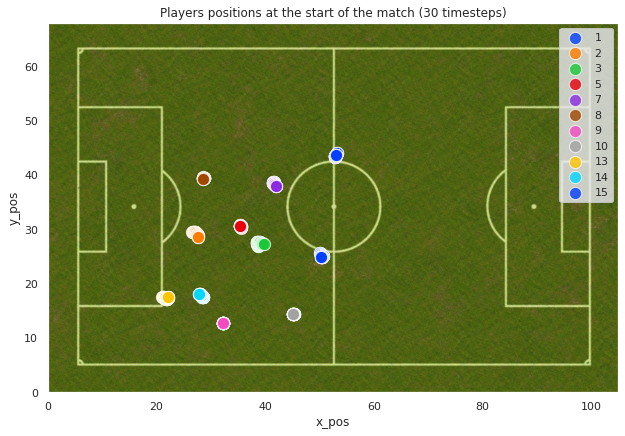

In [19]:
fig, ax = plt.subplots(figsize=(10.5,6.8)) 
ax.set_title("Players positions at the start of the match (30 timesteps)")

# Plotting the starting positions of each player
for i in sorted(X_filtered["tag_id"].unique()):
  starting_time = 0
  time_span = 30
  player_i = X_filtered.loc[X["tag_id"] == i].iloc[starting_time:starting_time+time_span]
  sns.scatterplot(data=player_i, x="x_pos", y="y_pos", legend="full", s=150, alpha=0.8)

soccer_pitch()

# Matplotlib stuff
ax.legend(sorted(X_filtered["tag_id"].unique()), loc="upper right")
ax.set_xbound([0,105])
ax.set_ybound([0,68])

#### Plot their mean 

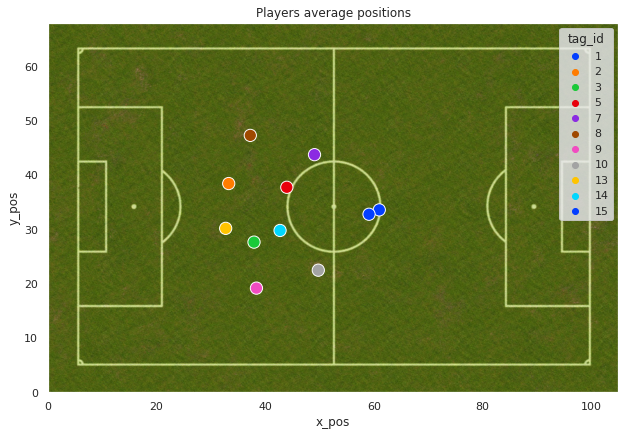

In [20]:
fig, ax = plt.subplots(figsize=(10.5,6.8))
ax.set_title("Players average positions")
sns.scatterplot(data=mean_locations, x="x_pos", y="y_pos", hue="tag_id", legend="full", palette=sns.color_palette(n_colors=len(mean_locations)), s=150)
soccer_pitch()
ax.set_xbound([0,105])
ax.set_ybound([0,68])